In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/HAppiness.csv")

df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [104]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations -

mean is almost same as meadian 50% ==> All are normal distribution except for trust and Generosity
gap between max and 75% is large ==> count ==> Outliers are present ==> Except for Freedom

In [105]:
df.shape

(158, 12)

# Checking NAN values

In [106]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

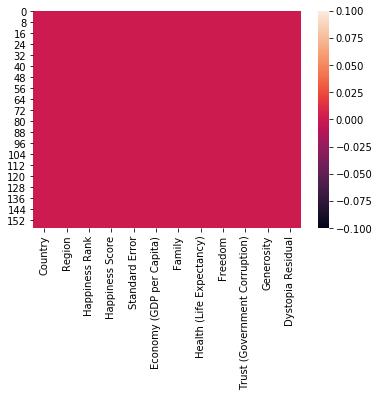

In [107]:
sns.heatmap(df.isnull())

Observation

No NAN value present in the data

# Checking ?

In [108]:
(df=='?').sum()

# No ? present

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Label Encoder

In [109]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [110]:
# Converting non numeric data to numeric for data analysis

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'].astype(str))
df['Country'] = le.fit_transform(df['Country'].astype(str))

In [111]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Univarient Analysis

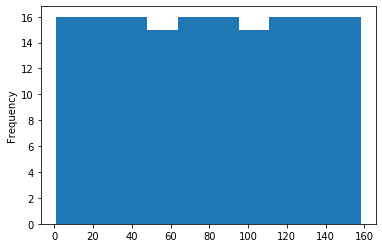

In [112]:
df["Happiness Rank"].plot.hist()

Frequency of Happiness rank is less in range of 50-70 and 100-120 

In [113]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

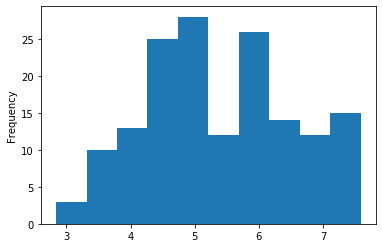

In [114]:
df["Happiness Score"].plot.hist()

Maximum countries have got score of around 4.5-5 and 5.5-6
Very few countries have got score less that 3.5and beyond 7.5

# Bivarient Analysis

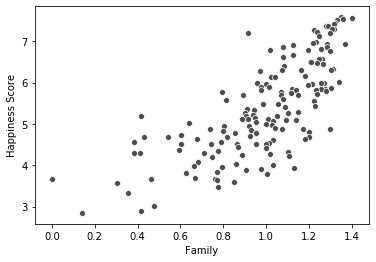

In [115]:
sns.scatterplot(x=df['Family'], y=df['Happiness Score'],data=df,color="0.3")

Hapiness Score and Family are positively correlated

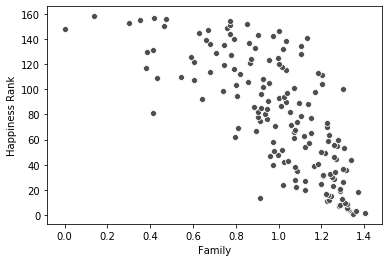

In [116]:
sns.scatterplot(x=df['Family'], y=df['Happiness Rank'],data=df,color="0.3")

Happiness Rank and Family are negatively correlated

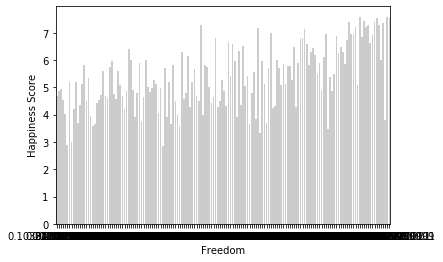

In [117]:
sns.barplot(x=df['Freedom'], y=df['Happiness Score'],data=df,color="0.8")

 Happiness Score and Freedom are positively correlated

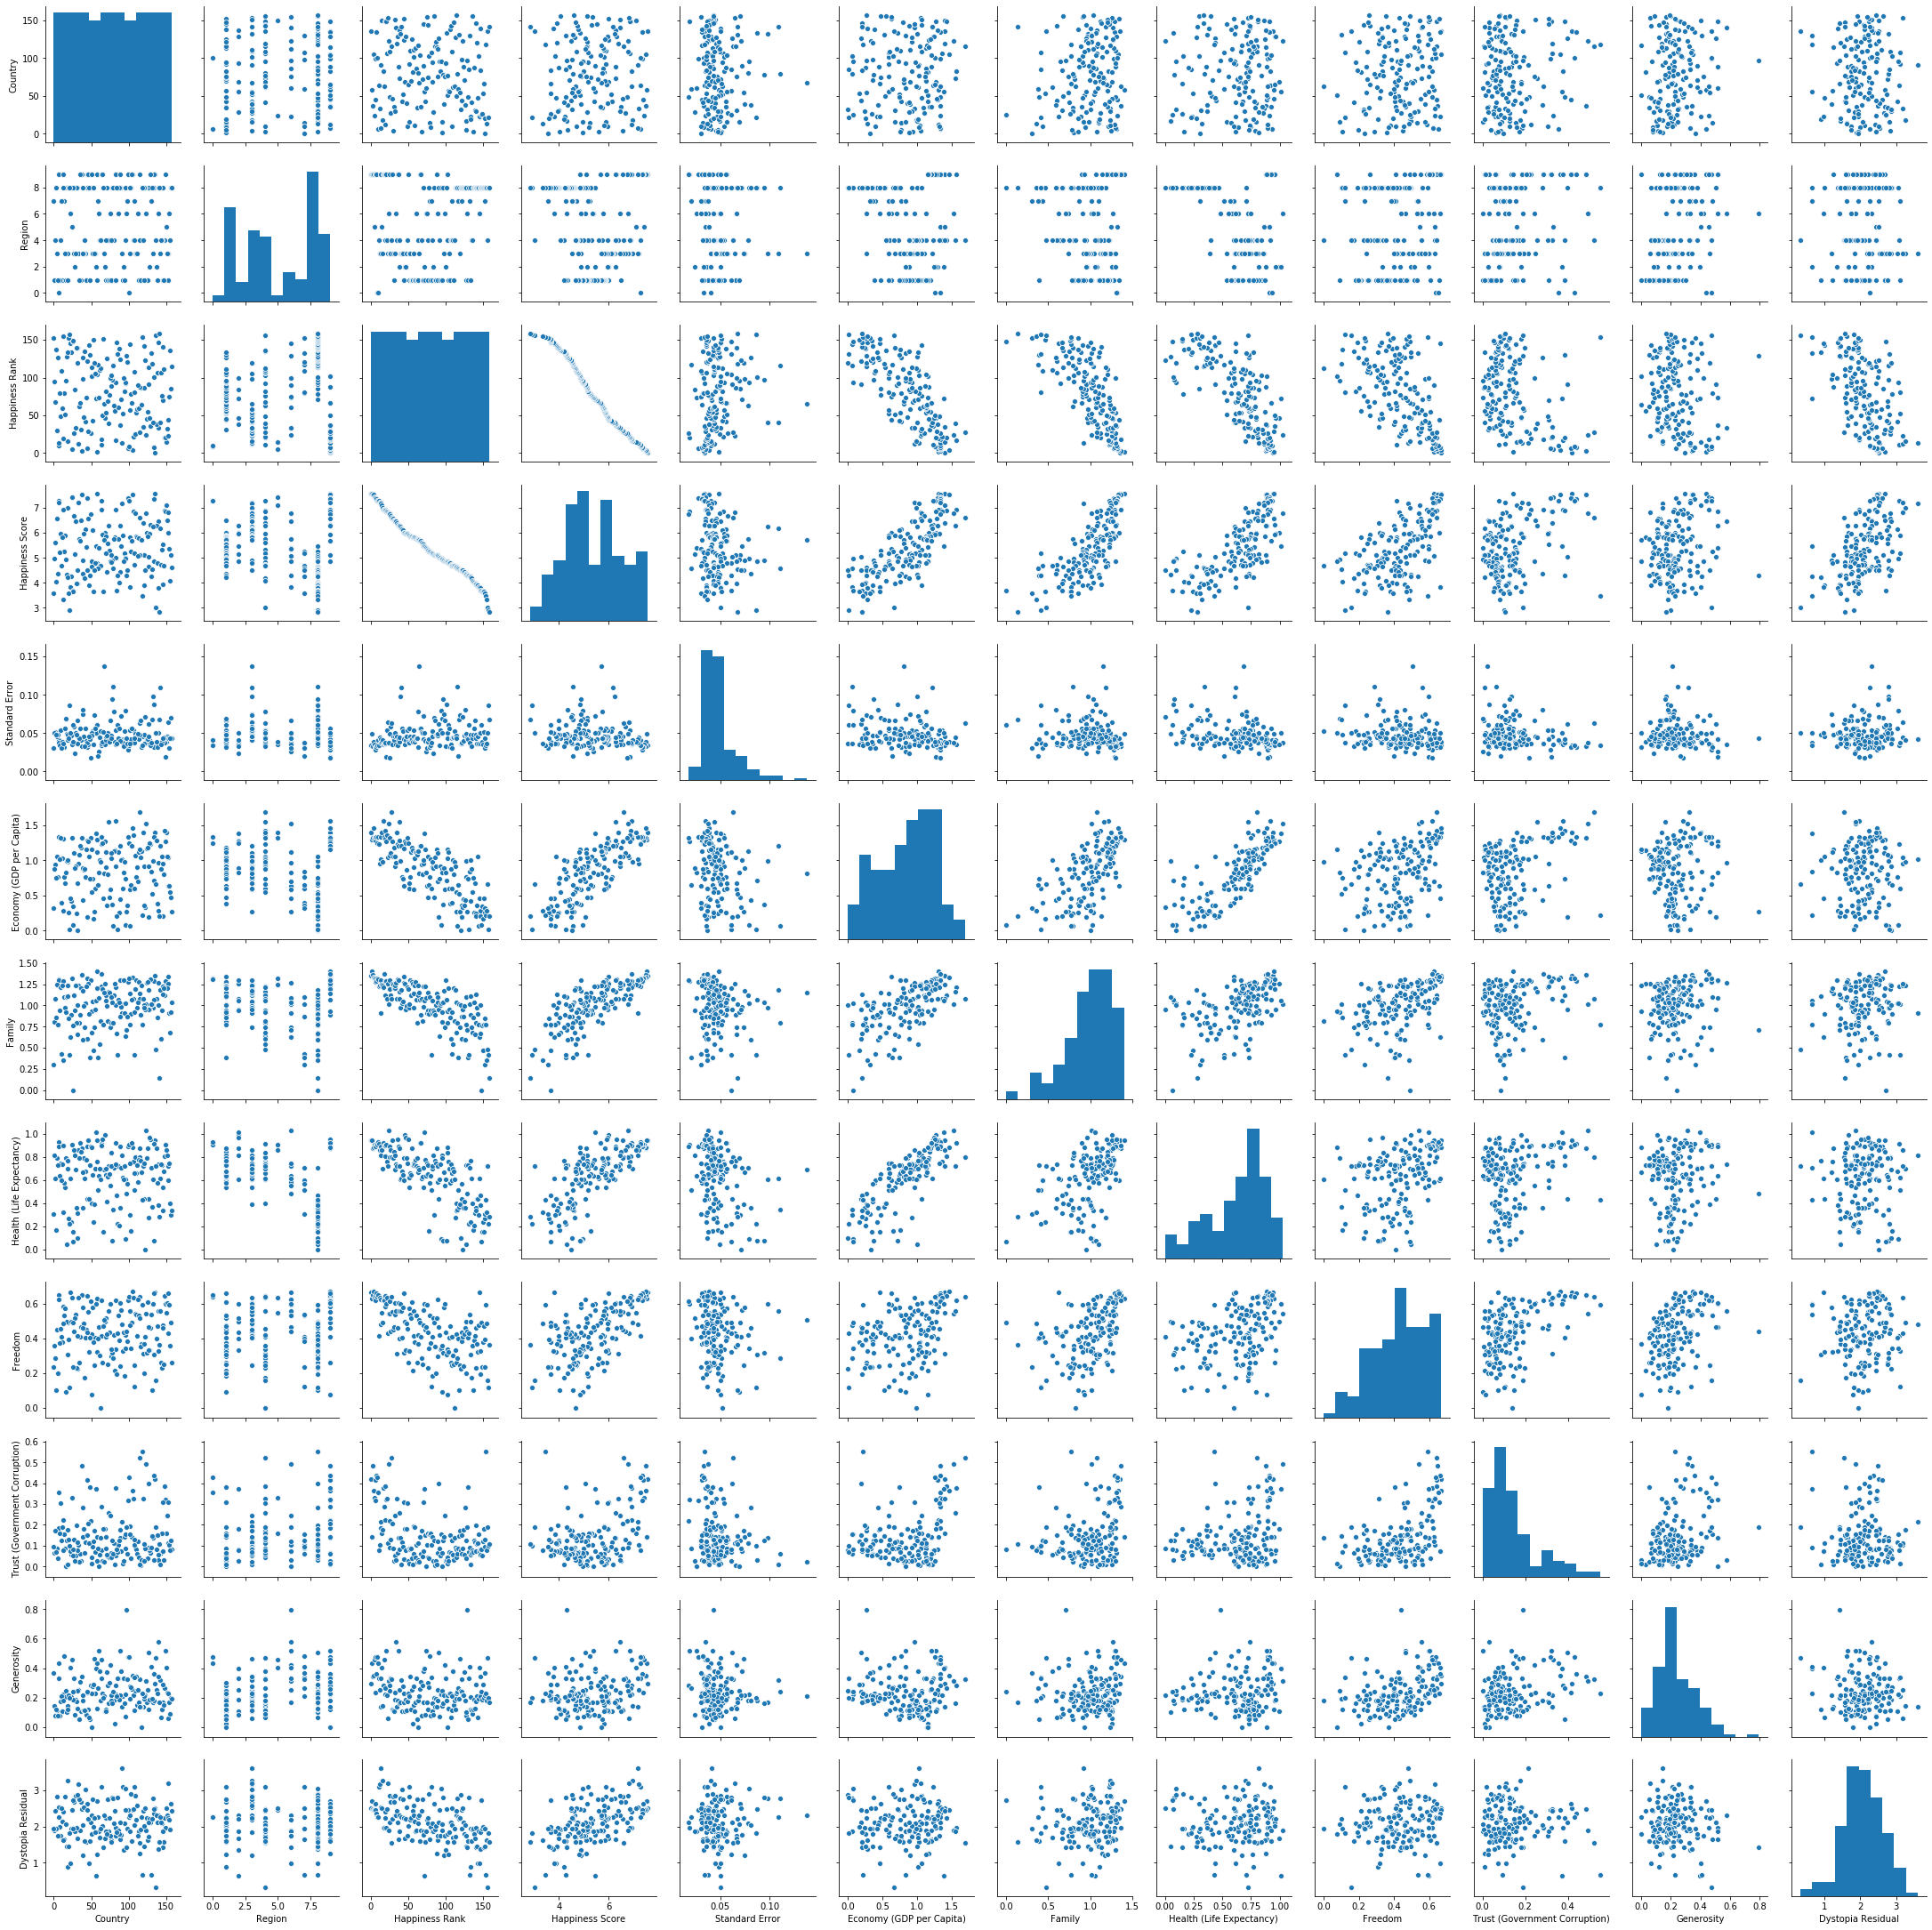

In [118]:
sns.pairplot(df)

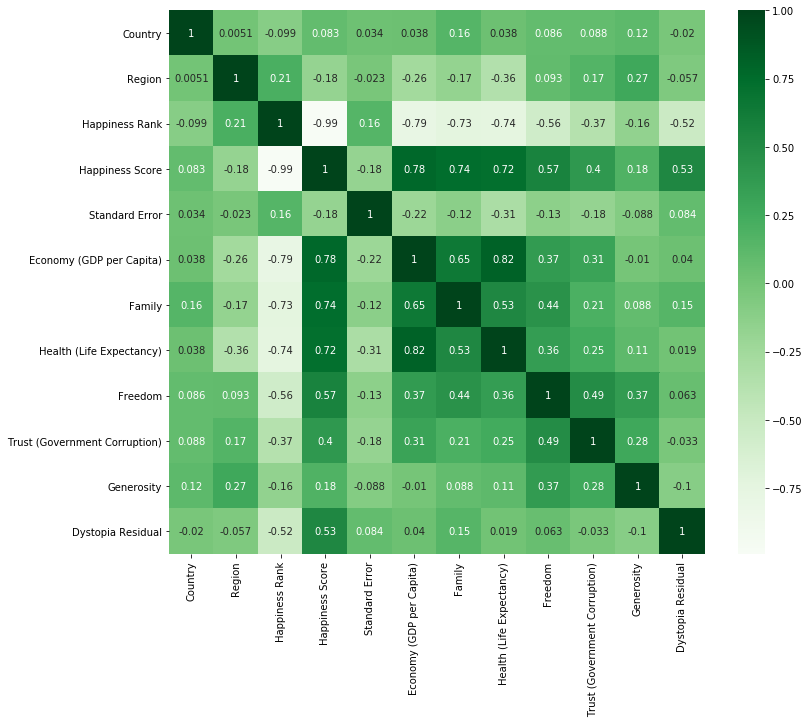

In [119]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr() ,  cmap = "Greens" , annot = True)

Observations

Positively correlated - 
1. Happiness Score - Economy, Family, Health, Freedome, Trust and Dyropia. To some extent with Generosity
2. Happiness Score and Happiness Rank are negatively correlated. Indicates country(Region) with hight happiness Score will get 1st rank

# Checking out Outliers and removing

In [120]:
col_list = df.columns.values

ncols = 10
nrows = 12

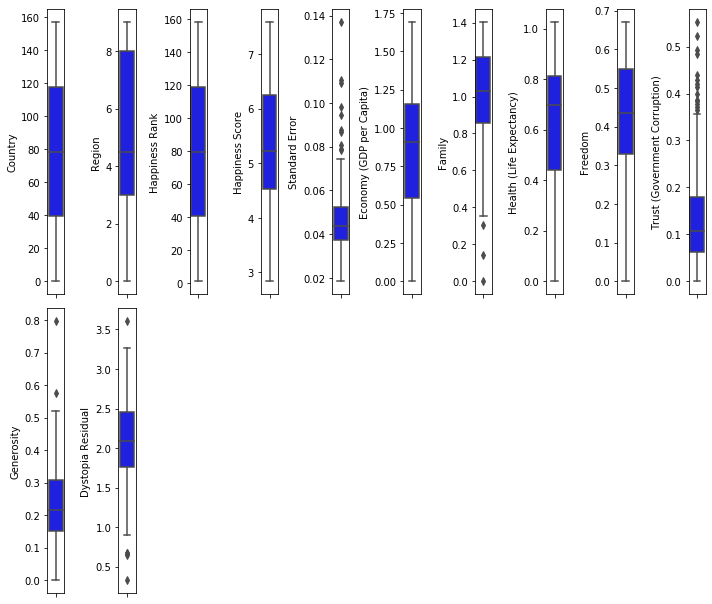

In [121]:

plt.figure(figsize = (ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'blue' , orient = 'v')
    plt.tight_layout()

Outliers are present in the Data

In [122]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [123]:
x1 = df_new.drop(["Happiness Score"],axis = 1)

x1

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [124]:
x1.shape

(149, 11)

In [125]:
y = df_new["Happiness Score"]

y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [126]:
y = y.values.reshape(-1,1)

y.shape

(149, 1)

# Checking Skewness

In [127]:
x1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Skewness is present in Standard Error, Family , Health , Generosity

In [129]:
# Reducing Skewness using squareroot method of numpy


for col in x1.columns:
    if x1.skew().loc[col]>0.55:
        x1[col] = np.sqrt(x1[col])[0]

In [130]:
x1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                  -0.010173
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.000000
Generosity                       0.000000
Dystopia Residual               -0.021144
dtype: float64

In [131]:
x = x1

# Data Analysis - Linear Regression Model

In [163]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42 , test_size = 0.20)

In [164]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((119, 11), (30, 11), (119, 1), (30, 1))

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

In [178]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [186]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor()
dtr = DecisionTreeRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000] , 
              "base_estimator" :[lreg, ls , dtr]}
gs = GridSearchCV(abr , parameters , cv = 5)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 1,
 'n_estimators': 1000}

In [187]:
lreg = LinearRegression()
knr = KNeighborsRegressor()
ls = Lasso()
gbr = GradientBoostingRegressor(learning_rate = 0.1 ,n_estimators = 100 )
abr = AdaBoostRegressor(learning_rate = 1 ,n_estimators = 500, base_estimator = lreg)

In [188]:
models = []
models.append(('KNeighborsRegressor' , knr))
models.append(('LinearRegression' , lreg))
models.append(('Lasso' , ls))
models.append(('GradientBooster' , gbr))
models.append(('Adaboost' , abr))

models

[('KNeighborsRegressor',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')),
 ('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('Lasso',
  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False)),
 ('GradientBooster',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_e

In [189]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [190]:
lreg.fit(x_train,y_train)
pre = lreg.predict(x_test)
r2 = r2_score(y_test,pre)
rme = np.sqrt(mean_squared_error(y_test,pre))

print(r2 , "\n" , rme)

0.9936503499165485 
 0.08511404660229321


In [191]:
Model = []
r2score = []
cv = []
rmse = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    r2s = r2_score(y_test,pred)
    print("r2 score :" , r2s)
    r2score.append(r2s*100)
    print("\n")
    sc = cross_val_score(model , x, y , cv = 10 , scoring = 'r2')
    print("Cross_Val_score : " , sc)
    cv.append(sc*100)
    print("\n")
    rme = np.sqrt(mean_squared_error(y_test,pred))
    print("RMSE : " , rme)
    rmse.append(rme)
    print("\n\n")
    

*************************** KNeighborsRegressor ***************************

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2 score : 0.9692612325417403


Cross_Val_score :  [-19.58036842  -0.77917842  -1.41269649  -9.01895945   0.53511023
  -2.22182891  -3.00272829  -2.93239961  -1.95217887  -4.57239264]


RMSE :  0.18727058498333368



*************************** LinearRegression ***************************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 score : 0.9936503499165485


Cross_Val_score :  [-2.38398727  0.61348372  0.52955144 -2.35185453  0.63423427 -1.92441845
  0.39926094 -2.21545863  0.32078913  0.76911469]


RMSE :  0.08511404660229321



*************************** Lasso ***************************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positi

In [192]:
result = pd.DataFrame({'Model' : Model , 'R2Score' : r2score , "RMSE" : rmse , "Cross_Val_Score" :cv})

result

,Model,R2Score,RMSE,Cross_Val_Score
0,KNeighborsRegressor,96.926123,0.187271,"[-1958.0368417084314, -77.91784246962561, -141..."
1,LinearRegression,99.365035,0.085114,"[-238.39872709748101, 61.34837208727102, 52.95..."
2,Lasso,98.918684,0.111072,"[-613.2896477059304, 70.4517877012944, 24.3398..."
3,GradientBooster,99.883654,0.036434,"[-787.3004910098527, -86.40862898407057, 42.64..."
4,Adaboost,99.341482,0.086678,"[-200.62512633279104, 63.35311585995937, 51.08..."


In [194]:
# Gradient Booster model as it has comapratively better r2score

gbr.predict(x_test)

array([5.32574152, 6.94026841, 4.51406216, 5.18907628, 5.25198013,
       6.45552709, 5.68681514, 3.81767716, 5.47019971, 5.12844425,
       4.67530567, 7.22405888, 6.30069373, 7.31076539, 6.86730507,
       5.79247118, 3.93828625, 5.40528249, 5.82469189, 4.07858639,
       6.57295256, 4.3439075 , 6.74409868, 4.27626682, 4.19115697,
       3.65300946, 4.60848146, 4.8042596 , 5.98506495, 6.57315604])

# Saving model

In [195]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(gbr , 'happiness.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('happiness.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([5.32574152, 6.94026841, 4.51406216, 5.18907628, 5.25198013,
       6.45552709, 5.68681514, 3.81767716, 5.47019971, 5.12844425,
       4.67530567, 7.22405888, 6.30069373, 7.31076539, 6.86730507,
       5.79247118, 3.93828625, 5.40528249, 5.82469189, 4.07858639,
       6.57295256, 4.3439075 , 6.74409868, 4.27626682, 4.19115697,
       3.65300946, 4.60848146, 4.8042596 , 5.98506495, 6.57315604])